`강화학습`
# Multi-Armed Bandit Problem

## 문제 개요
Multi-Armed Bandit 문제는 강화 학습 및 온라인 학습에서 매우 중요한 문제로, 제한된 자원을 사용하여 여러 대안 중 최적의 선택을 탐색하고자 할 때 발생하는 문제입니다. 이 문제의 이름은 도박장에서 여러 개의 슬롯 머신(각각의 머신이 하나의 "arm"으로 간주됨) 중에서 가장 높은 보상을 주는 머신을 찾는 상황에 비유할 수 있습니다.

## 문제 정의
Multi-Armed Bandit 문제는 여러 개의 슬롯 머신(arm)이 존재하고, 각 머신은 서로 다른 확률 분포에 따라 보상을 반환합니다. 플레이어는 **탐색(exploration)**과 **활용(exploitation)** 사이의 균형을 맞추며, 보상을 최대화할 수 있는 머신을 선택하는 전략을 개발해야 합니다.

- **탐색(Exploration)**: 새로운 머신을 시도하여 그 성능을 파악하는 단계.
- **활용(Exploitation)**: 이미 파악된 머신 중에서 가장 높은 보상을 주는 머신을 선택하는 단계.

## 알고리즘 및 접근법
Multi-Armed Bandit 문제를 해결하는 데 사용되는 대표적인 알고리즘은 다음과 같습니다:

1. **Epsilon-Greedy Algorithm**
   - 주어진 확률 $epsilon$을 기준으로 탐색과 활용을 결정.
   - $epsilon$의 확률로 무작위로 탐색하며, $1 - epsilon$의 확률로 현재까지 가장 높은 보상을 준 머신을 선택.
   
2. **UCB1 (Upper Confidence Bound Algorithm)**
   - 각 머신에 대해 보상 평균과 탐색의 불확실성을 고려하여 선택.
   - 탐색 초기에는 모든 머신을 한 번씩 시도한 후, 평균 보상과 신뢰 구간의 조합을 이용해 머신 선택.
   
3. **Thompson Sampling**
   - 베이즈적 접근을 사용하여 각 머신의 보상 분포를 샘플링.
   - 각 머신의 성공과 실패 횟수를 갱신하며, 베타 분포 기반 샘플링으로 탐색과 활용을 자동으로 조절.

## 수학적 모델링
각 arm $i$에 대해 보상 분포 $R_i$가 존재하며, 기대값 $\mu_i$는 해당 arm의 평균 보상을 나타냅니다. 목표는 $T$번의 시행 동안 **평균 보상** $\sum_{t=1}^{T} R_{a_t}$를 최대화하는 것입니다. 여기서 $a_t$는 $t$번째 시도에서 선택한 arm입니다.

### Regret
Regret은 최적의 선택과 현재 선택 간의 성능 차이를 나타내며, 이는 탐색과 활용의 균형을 평가하는 중요한 지표입니다.
$$
\text{Regret}(T) = T \mu^* - \sum_{t=1}^{T} \mu_{a_t}
$$
여기서 $\mu^*$는 가장 높은 기대 보상을 주는 arm의 평균 보상입니다.

## 응용 분야
Multi-Armed Bandit 문제는 다양한 실세계 문제에 적용됩니다.
- **온라인 광고 최적화**: 사용자에게 가장 효과적인 광고를 선택하여 클릭률을 높이는 문제.
- **의료 실험**: 새로운 치료법의 효능을 비교하며 최적의 치료법을 찾는 문제.
- **추천 시스템**: 사용자가 좋아할 만한 콘텐츠를 선택하는 과정에서 탐색과 활용의 균형을 맞추는 문제.

Multi-Armed Bandit 문제는 강화 학습과 머신러닝의 초석이 되는 문제로, 탐색과 활용의 균형을 학습하는 중요한 프레임워크입니다.


첫 번째 코드(단순 구현)

- rewards라는 리스트에 모든 보상을 저장하면서, 평균을 계산할 때마다 모든 이전 보상의 합을 구하고 나누는 작업을 수행합니다.

- 이는 각 보상을 저장하기 위한 추가 메모리가 필요하며, 보상의 수가 커질수록 메모리 사용량도 증가합니다.

- 평균을 계산할 때마다 리스트의 모든 요소를 합산하므로 시간 복잡도가 상대적으로 높아질 수 있습니다.

두 번째 코드(증분 구현)

- Q 변수 하나만 사용하여 평균을 업데이트하므로 추가적인 메모리 사용이 없습니다.

- 새로운 보상이 들어올 때마다 현재 평균 Q를 증분 방식으로 업데이트하므로, 메모리를 절약할 수 있고 계산이 효율적입니다.

- 시간 복잡도는 **O(1)**로, 평균 계산에 있어서 보상 수와 관계없이 일정한 시간이 걸립니다.

In [1]:
import numpy as np

# 기본 구현
np.random.seed(0)  # 시드 고정
rewards = []

for n in range(1, 11):  # 10번 플레이
    reward = np.random.rand()  # 보상(무작위수로 시뮬레이션)
    rewards.append(reward)
    Q = sum(rewards) / n
    print(Q)

print('---')

# 증분 구현
np.random.seed(0)
Q = 0

for n in range(1, 11):
    reward = np.random.rand()
    Q = Q + (reward - Q) / n  # [식 1.5]
    print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571294
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425
---
0.5488135039273248
0.6320014351498722
0.6222554154571294
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


In [2]:
Qs = np.zeros(10)
np.argmax(Qs)

0

865


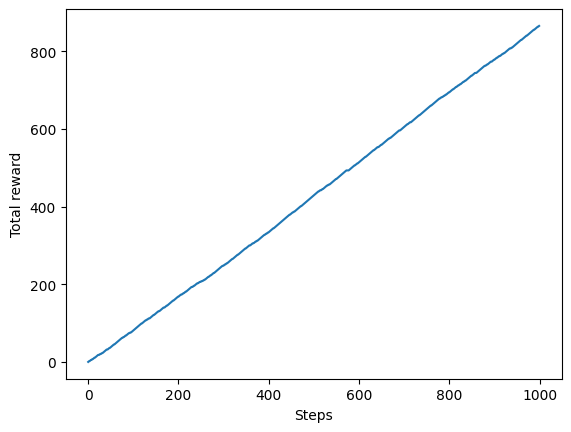

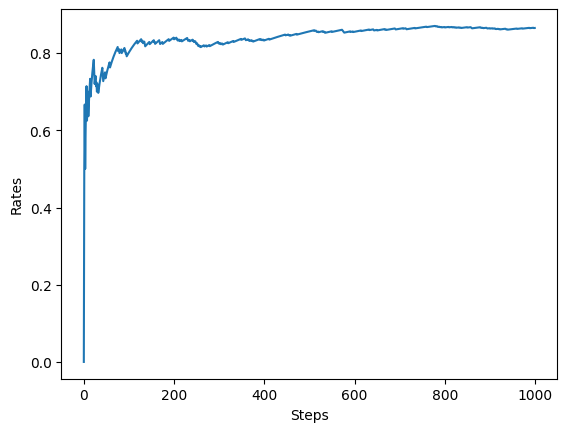

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms)
        #if True: print('new',self.rates)
    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            #if False : print(np.random.rand())
            return 1
        else:
            return 0
         


class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, select_machine, reward):
        self.ns[select_machine] += 1
        self.Qs[select_machine] += (reward - self.Qs[select_machine]) / self.ns[select_machine]

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)


steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    select_machine = agent.get_action()
    reward = bandit.play(select_machine)
    agent.update(select_machine, reward)
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))

print(total_reward)

plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

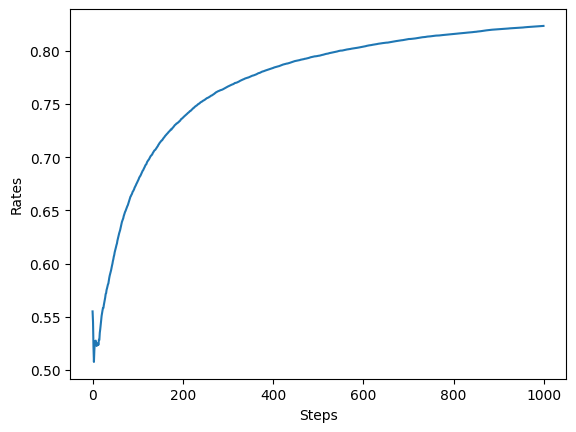

In [4]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))  # (2000, 1000)

for run in range(runs):
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (step + 1))

    all_rates[run] = rates

avg_rates = np.average(all_rates, axis=0)

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()


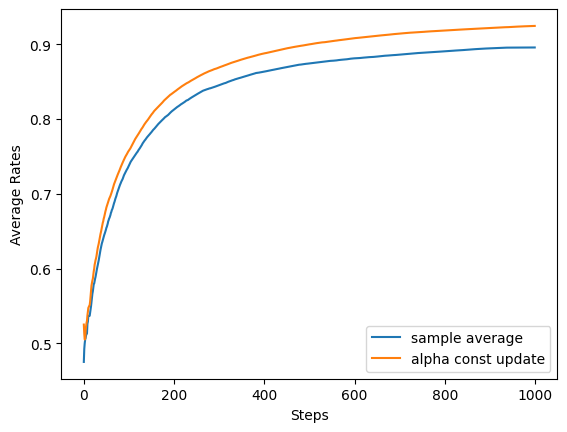

In [ ]:
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms)  # Add noise
        if rate > np.random.rand():
            return 1
        else:
            return 0


class AlphaAgent:
    def __init__(self, epsilon, alpha, actions=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha

    def update(self, select_machine, reward):
        self.Qs[select_machine] += (reward - self.Qs[select_machine]) * self.alpha

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)


runs = 200
steps = 1000
epsilon = 0.1
alpha = 0.8
agent_types = ['sample average', 'alpha const update']
results = {}

for agent_type in agent_types:
    all_rates = np.zeros((runs, steps))  # (200, 1000)

    for run in range(runs):
        if agent_type == 'sample average':
            agent = Agent(epsilon)
        else:
            agent = AlphaAgent(epsilon, alpha)

        bandit = NonStatBandit() # 머신을 당길때마다 새롭게 인스턴스를 생성해서 확률을 무작위화
        total_reward = 0
        rates = []

        for step in range(steps):
            select_machine = agent.get_action()
            reward = bandit.play(select_machine)
            agent.update(select_machine, reward)
            total_reward += reward
            rates.append(total_reward / (step + 1))

        all_rates[run] = rates

    avg_rates = np.average(all_rates, axis=0)
    results[agent_type] = avg_rates

# plot
plt.figure()
plt.ylabel('Average Rates')
plt.xlabel('Steps')
for key, avg_rates in results.items():
    plt.plot(avg_rates, label=key)
plt.legend()
plt.show()